# Задача регрессии

In [40]:
import pandas as pd
dt = pd.read_csv('candy-data.csv',encoding='utf-8')

Выкинем название, поскольку от него ничего не зависит.

In [41]:
dt=dt.drop(['competitorname'],axis=1)
dt

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
hard: Is it a hard candy?
bar: Is it a candy bar?
pluribus: Is it one of many candies in a bag or box?
sugarpercent: The percentile of sugar it falls under within the data set.
pricepercent: The unit price percentile compared to the rest of the set.
winpercent: The overall win percentage according to 269,000 matchups.


candy-data.csv включает атрибуты для каждой конфеты вместе с ее рейтингом. Для двоичных переменных 1 означает «да», 0 означает «нет». Данные содержат следующие поля:
+ chocolate: содержит ли он шоколад?
+ fruity: фруктовый или ароматизированный?
+ caramel: есть ли карамель в конфете?
+ peanutalmondy: содержит ли арахис, арахисовое масло или миндаль?
+ nougat: содержит ли нугу?
+ crispedricewafer: содержит ли хрустящий рис, вафли или компонент печенья?
+ hard: Это крепкая конфета?
+ bar: Это моноблок?
+ pluribus: Это одна из многих конфет в сумке или коробке?
+ sugarpercent: процентиль сахара, под которым он попадает в набор данных.
+ pricepercent: процентиль цены за единицу по сравнению с остальной частью набора.
+ winpercent: общий процент побед по данным 269 000 матчей.

Полледняя переменаая - целевая

In [42]:
dt.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [43]:
dt.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [44]:
dt.dtypes

chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [45]:
# Количество наблюдений в наборе
print('Количество наблюдений: ',len(dt))
# Количество полей 
print('Количество полей: ', len(dt.columns),'(не учитывая индекс)')
# Тип данных каждого поля
print('\n','Типы данных','\n'+'-'*20+'\n', dt.dtypes)
# Уникальные поля
print('\n','Количество уникальных значений','\n'+'-'*20)
for i in dt.columns:
    print(i,dt[i].value_counts().count())

Количество наблюдений:  85
Количество полей:  12 (не учитывая индекс)

 Типы данных 
--------------------
 chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

 Количество уникальных значений 
--------------------
chocolate 2
fruity 2
caramel 2
peanutyalmondy 2
nougat 2
crispedricewafer 2
hard 2
bar 2
pluribus 2
sugarpercent 34
pricepercent 29
winpercent 85


In [46]:
# Количество отсутствующих значений 
print('Количество отсутствующих значений',dt.isna().sum(),sep='\n'+'-'*20+'\n')

Количество отсутствующих значений
--------------------
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


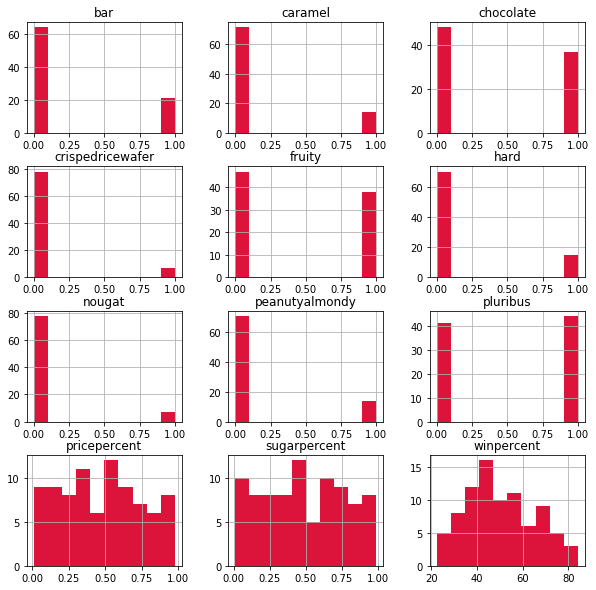

In [33]:
import matplotlib.pyplot as plt
# Распределение всех числовых полей
dt.hist(figsize=(10,10), color='crimson')
plt.show()

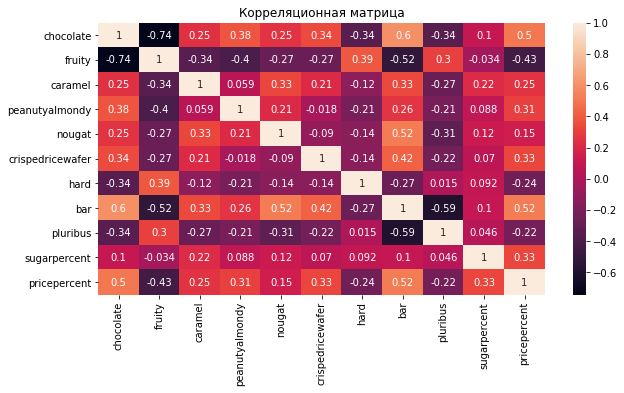

In [35]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dt.drop(['winpercent'],axis=1).corr(),annot=True)
plt.title('Корреляционная матрица')
plt.show()

По корреляционной матрице можно сделать вывод, что регрессоры между собой малозависимы, ничего выкидывать не будем.

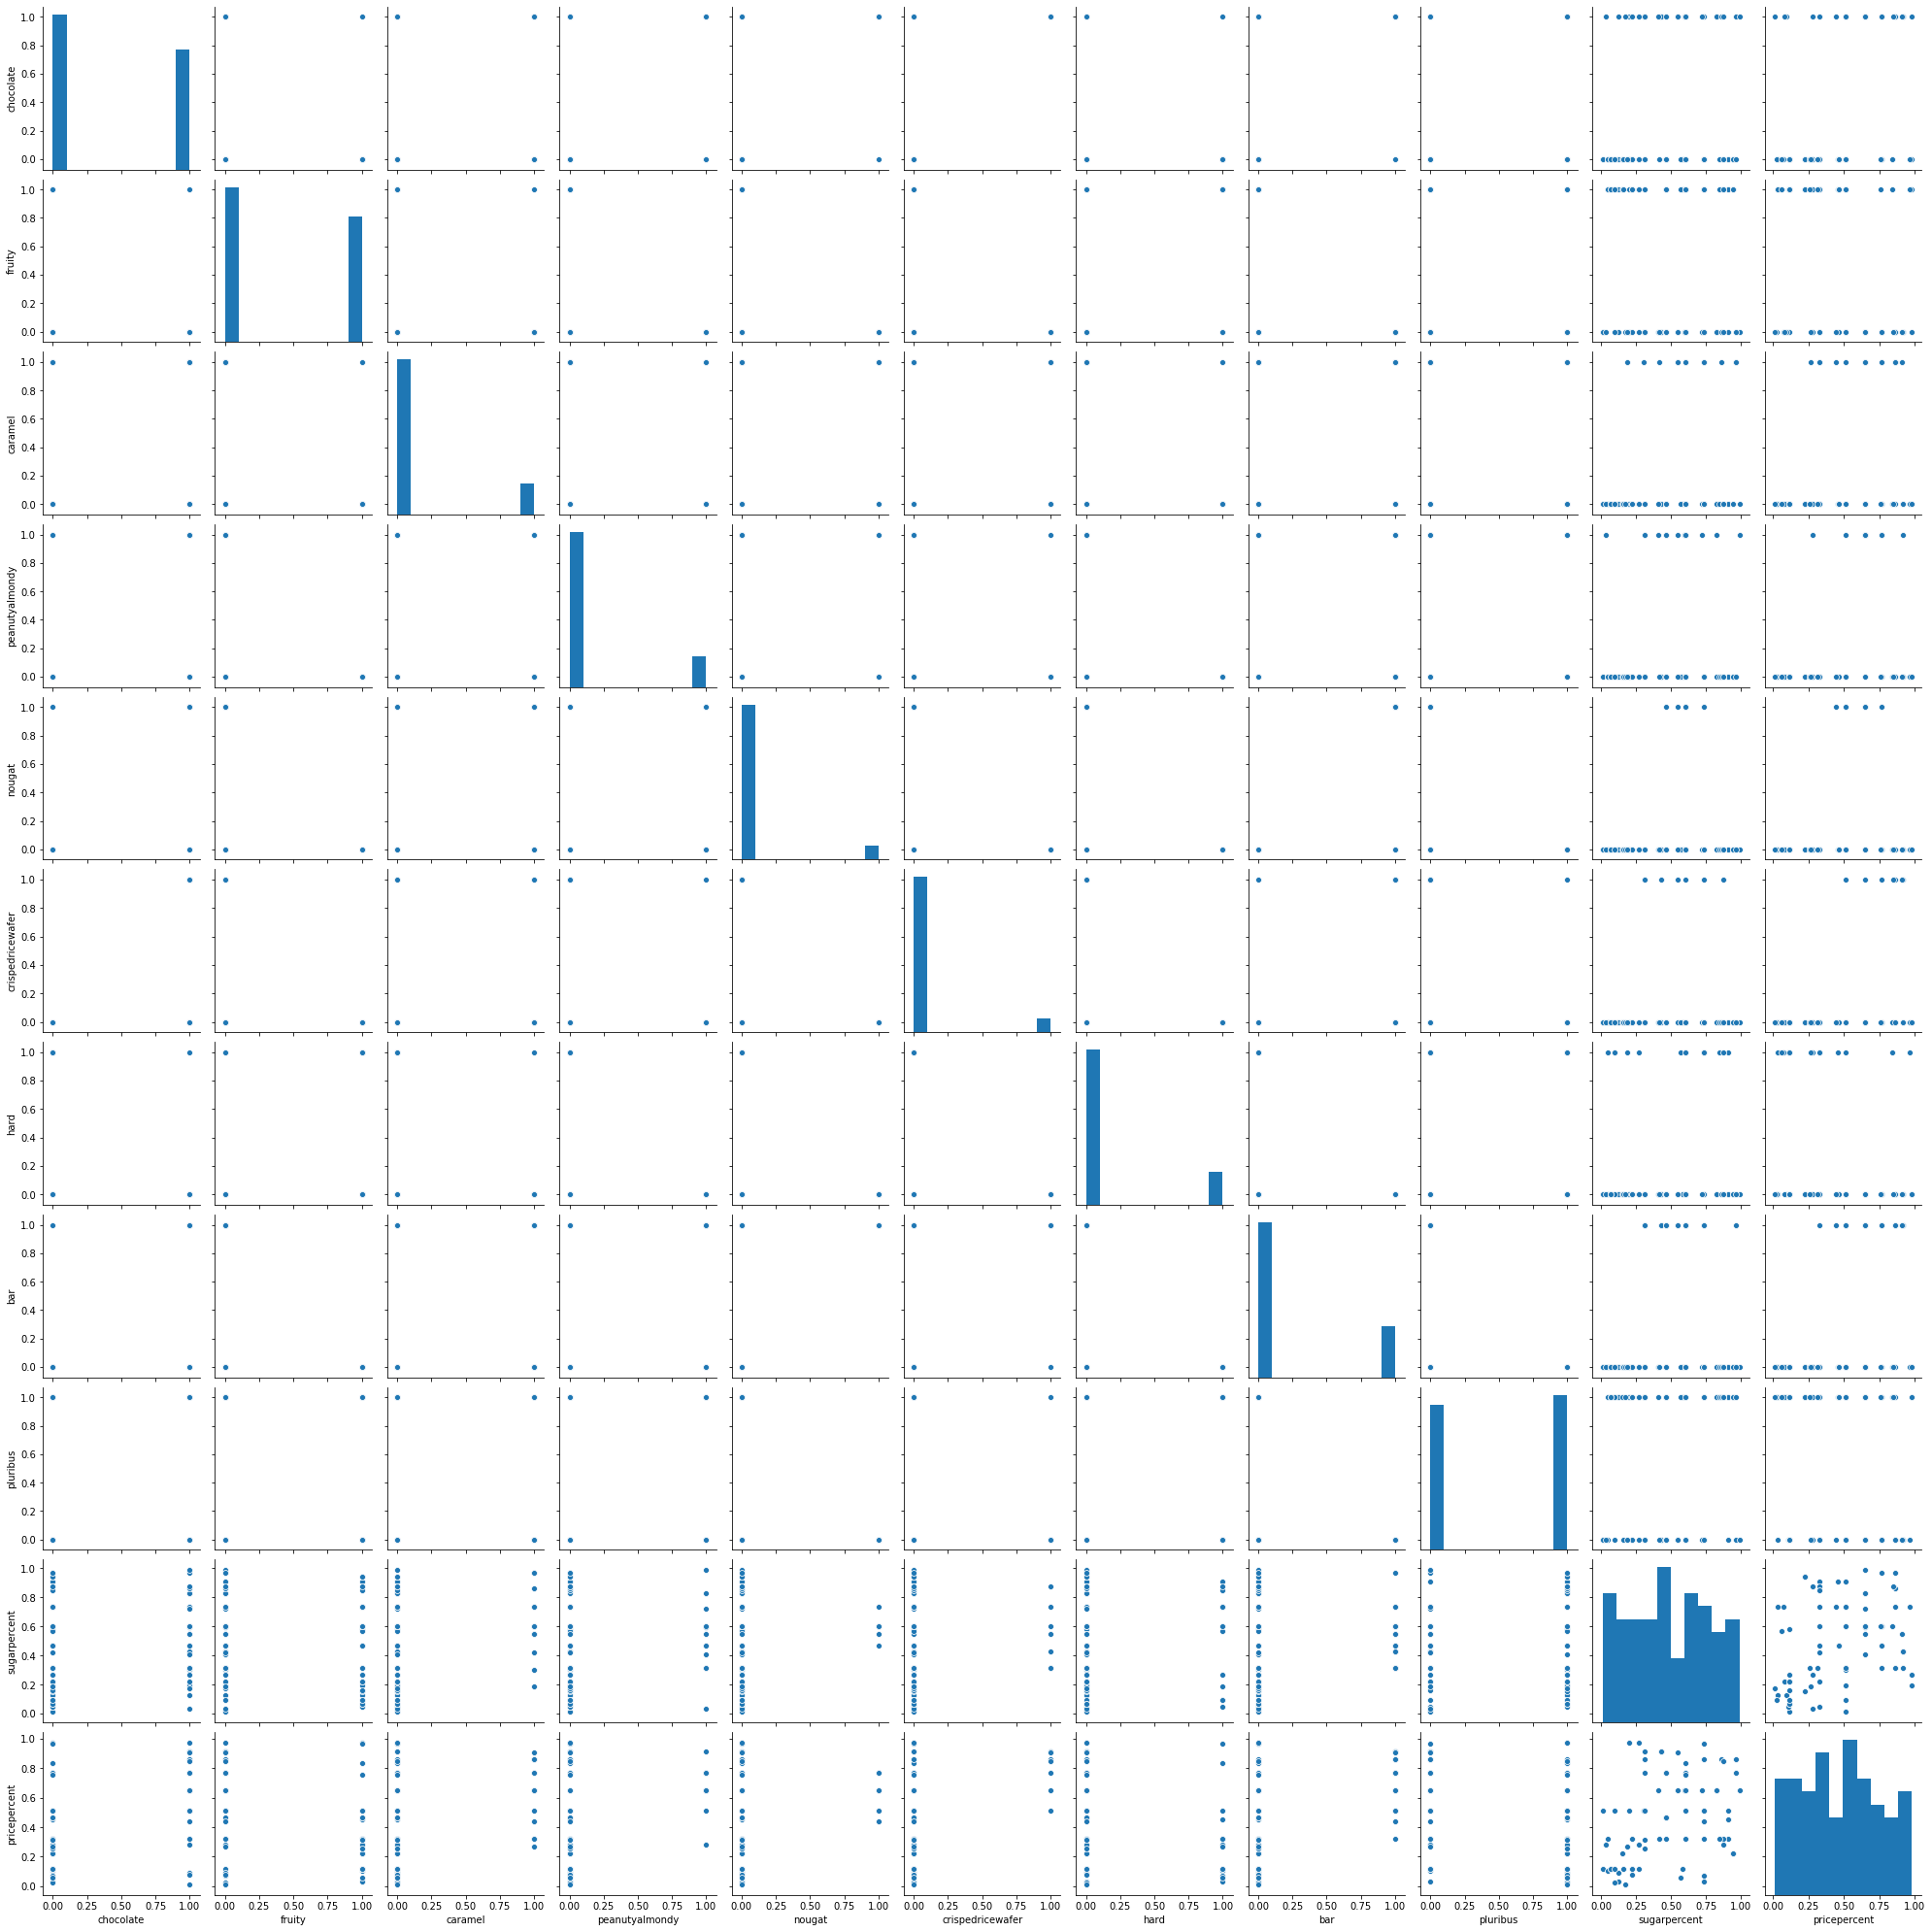

In [36]:
sns.pairplot(dt.drop(['winpercent'],axis=1))

In [48]:
X=dt.drop('winpercent',axis=1)
y=dt.winpercent

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=69)

## Линейная регрессия

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
m1 = linear_model.LinearRegression()
m1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
p1=m1.predict(X_test)

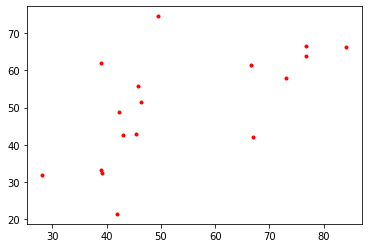

In [60]:
plt.scatter(y_test,p1, c='r',marker='.')

In [63]:
import numpy as np
from sklearn import metrics
r1=m1.score(X_train,y_train)
mae1=metrics.mean_absolute_error(y_test, p1)
mse1=metrics.mean_squared_error(y_test, p1)
rmse1=np.sqrt(metrics.mean_squared_error(y_test, p1))

## Ридж

In [64]:
m2 = Ridge()
m2.fit(X_train,y_train)
p2=m2.predict(X_test)

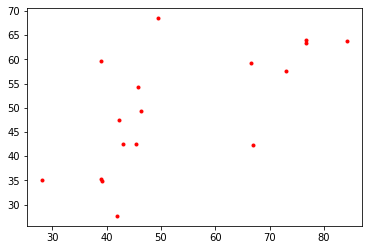

In [65]:
plt.scatter(y_test,p2, c='r',marker='.')

In [68]:
r2=m2.score(X_train,y_train)
mae2=metrics.mean_absolute_error(y_test, p2)
mse2=metrics.mean_squared_error(y_test, p2)
rmse2=np.sqrt(metrics.mean_squared_error(y_test, p2))

## Лассо

In [66]:
m3 = Lasso()
m3.fit(X_train,y_train)
p3=m3.predict(X_test)

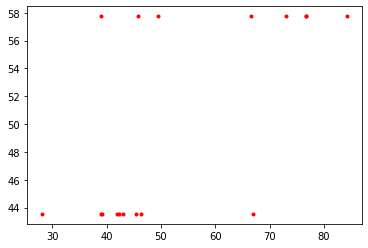

In [67]:
plt.scatter(y_test,p3, c='r',marker='.')

In [69]:
r3=m3.score(X_train,y_train)
mae3=metrics.mean_absolute_error(y_test, p3)
mse3=metrics.mean_squared_error(y_test, p3)
rmse3=np.sqrt(metrics.mean_squared_error(y_test, p3))

## Градиентный бустинг

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
m4 = GradientBoostingRegressor()
m4.fit(X_train, y_train)
p4=m4.predict(X_test)

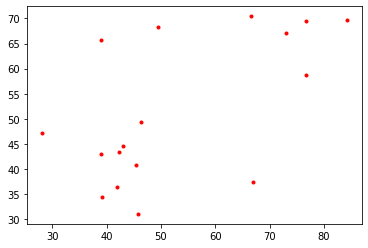

In [71]:
plt.scatter(y_test,p4, c='r',marker='.')

In [72]:
r4=m4.score(X_train,y_train)
mae4=metrics.mean_absolute_error(y_test, p4)
mse4=metrics.mean_squared_error(y_test, p4)
rmse4=np.sqrt(metrics.mean_squared_error(y_test, p4))

## Случайный лес

In [74]:
from sklearn.ensemble import RandomForestRegressor
m5 = RandomForestRegressor()
m5.fit(X_train, y_train)
p5=m5.predict(X_test)

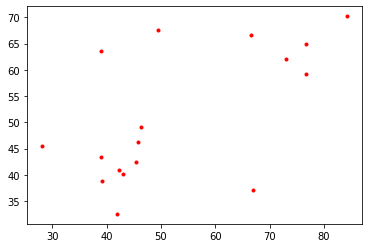

In [75]:
plt.scatter(y_test,p5, c='r',marker='.')

In [76]:
r5=m5.score(X_train,y_train)
mae5=metrics.mean_absolute_error(y_test, p5)
mse5=metrics.mean_squared_error(y_test, p5)
rmse5=np.sqrt(metrics.mean_squared_error(y_test, p5))

## Регрессия опорных векторов

In [78]:
from sklearn.svm import SVR
m6=SVR(kernel='linear')
m6.fit(X_train, y_train)
p6=m6.predict(X_test)

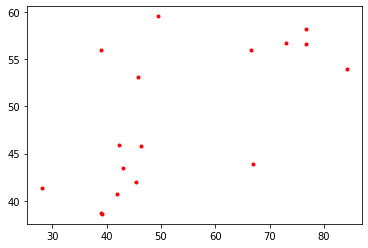

In [79]:
plt.scatter(y_test,p6, c='r',marker='.')

In [80]:
r6=m6.score(X_train,y_train)
mae6=metrics.mean_absolute_error(y_test, p6)
mse6=metrics.mean_squared_error(y_test, p6)
rmse6=np.sqrt(metrics.mean_squared_error(y_test, p6))

## Регрессия ближайших соседей

In [82]:
from sklearn.neighbors import KNeighborsRegressor
m7 = KNeighborsRegressor(n_neighbors=4)
m7.fit(X_train, y_train)
p7=m7.predict(X_test)

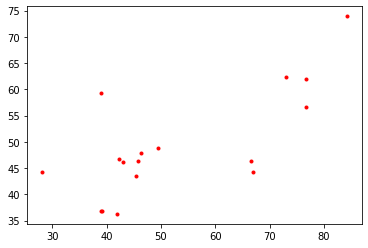

In [83]:
plt.scatter(y_test,p7, c='r',marker='.')

In [84]:
r7=m7.score(X_train,y_train)
mae7=metrics.mean_absolute_error(y_test, p7)
mse7=metrics.mean_squared_error(y_test, p7)
rmse7=np.sqrt(metrics.mean_squared_error(y_test, p7))

## Сравнение результатов

In [85]:
t=['Linear Regression','Ridge','Lasso','Gradient Boosting','Random Forest','SVR','KNN']
col=['r^2','mae', 'mse', 'rmse']
itog=pd.DataFrame([[r1,mae1,mse1,rmse1],[r2,mae2,mse2,rmse2],
                     [r3,mae3,mse3,rmse3],[r4,mae4,mse4,rmse4],
                   [r5,mae5,mse5,rmse5],[r6,mae6,mse6,rmse6],[r7,mae7,mse7,rmse7]], index=t, columns=col)
itog

,r^2,mae,mse,rmse
Linear Regression,0.572771,11.473985,194.298625,13.939104
Ridge,0.559603,10.747763,167.407613,12.938609
Lasso,0.393430,10.799252,184.879579,13.597043
Gradient Boosting,0.953277,10.737800,191.674177,13.844644
Random Forest,0.905053,9.941025,177.992520,13.341384
SVR,0.384145,10.372865,189.139546,13.752801
KNN,0.562907,9.274837,148.813825,12.198927


<BarContainer object of 7 artists>

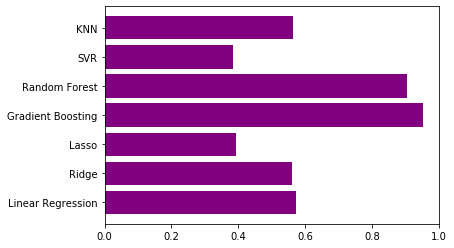

In [86]:
plt.barh(t,itog['r^2'], color='purple')

<BarContainer object of 7 artists>

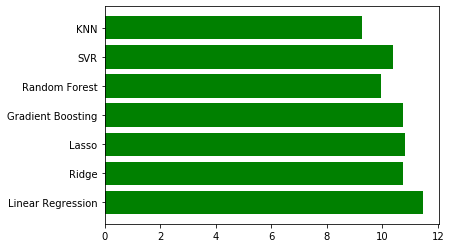

In [87]:
plt.barh(t,itog['mae'], color='green')

<BarContainer object of 7 artists>

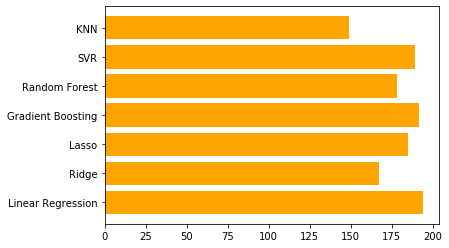

In [88]:
plt.barh(t,itog['mse'], color='orange')

<BarContainer object of 7 artists>

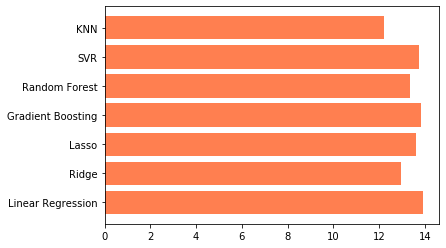

In [89]:
plt.barh(t,itog['rmse'], color='coral')

На графиках визуально показаны значения метрик оценивания рассмотренных моделей.
Наибольший коэффициент детерминации наблюдается у градиентного бустинга, однако наименьшие показатели ошибок у регрессии ближайших соседей. Однакоя бы выбрал(а) градиентный бустинг как наилучшую модель.